### REFERENCE
Grant Kiehne, "minimum variance w/ constraint" https://www.quantopian.com/posts/minimum-variance-w-slash-constraint posted on 2016-02-06, last accessed 2018-11-23


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from scipy import optimize
import numpy as np

In [54]:
ret = np.random.normal(0.0,0.1,(10,252))

In [55]:
def variance(x,*args):    
    p = np.squeeze(np.asarray(args))
    Acov = np.cov(p)
    v = np.dot(x,np.dot(Acov,x))
    return v

ret_mean = ret.mean(axis=1)
ret_std = ret.std(axis=1)
ret_norm = ret_mean/ret_std

x,_=ret.shape
eps = 1e-8
bnds = tuple([(-0.2,0.5)]*x) #long and short
weights = tuple([0.5]*x)
cons = (
    {'type': 'eq', 'fun': lambda x:  np.sum(np.abs(x))-1.0},
    {'type': 'eq', 'fun': lambda x:  np.dot(x,ret_norm)-eps},
    )
res=optimize.minimize(variance, weights, args=ret, method='SLSQP',constraints=cons,bounds=bnds)
mvpweights = np.expand_dims(np.array([round(y,2) for y in res.x]),axis=-1)
print('minimum variance {}'.format(' '.join(['{:1.3f}'.format(x) for x in res.x])))


minimum variance 0.093 0.128 0.053 0.100 0.086 0.130 0.123 0.105 0.127 0.056


In [56]:
# why why why
def max_sharpe(x,*args):    
    p = np.squeeze(np.asarray(args))
    ret_mean = ret.mean(axis=1)
    ret_std = ret.std(axis=1)
    ret_norm = ret_mean/ret_std
    v = -1.*np.dot(ret_norm,x) 
    return v


bnds = tuple([(-1.0,1.0)]*x) #long and short
weights = tuple([0.5]*x)
cons = (
    {'type': 'eq', 'fun': lambda x:  np.sum(np.abs(x))-1.0},
    )
res=optimize.minimize(max_sharpe, weights, args=ret, method='SLSQP',constraints=cons,bounds=bnds)
yoloweights = np.expand_dims(np.array([round(y,2) for y in res.x]),axis=-1)
print('yolo max sharpe {}'.format(' '.join(['{:1.3f}'.format(x) for x in res.x])))

yolo max sharpe -0.000 -0.000 -1.000 0.000 -0.000 -0.000 -0.000 -0.000 0.000 -0.000


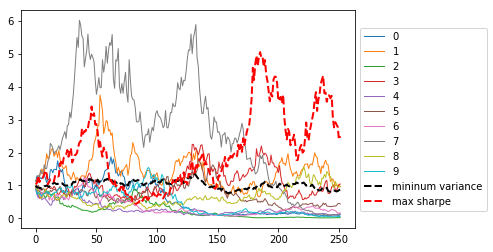

In [57]:
price = np.cumprod(1+ret,axis=1).T
df = pd.DataFrame.from_records(price)
df.plot(legend=False,linewidth=1,linestyle='-')

port = np.sum(mvpweights*ret,axis=0)
port = np.cumprod(1+port)
plt.plot(port,color='black',label='mininum variance',linewidth=2,linestyle='--')

port = np.sum(yoloweights*ret,axis=0)
port = np.cumprod(1+port)
plt.plot(port,color='red',label='max sharpe',linewidth=2,linestyle='--')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))